<a href="https://colab.research.google.com/github/OseiasBeu/FormacaoMachineLearningAvancada/blob/main/Deep_Learning_Previsao_Com_Keras/curso_deep_learning_previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exploração

In [2]:
passageiros = pd.read_csv(r'https://raw.githubusercontent.com/OseiasBeu/FormacaoMachineLearningAvancada/main/Deep_Learning_Previsao_Com_Keras/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

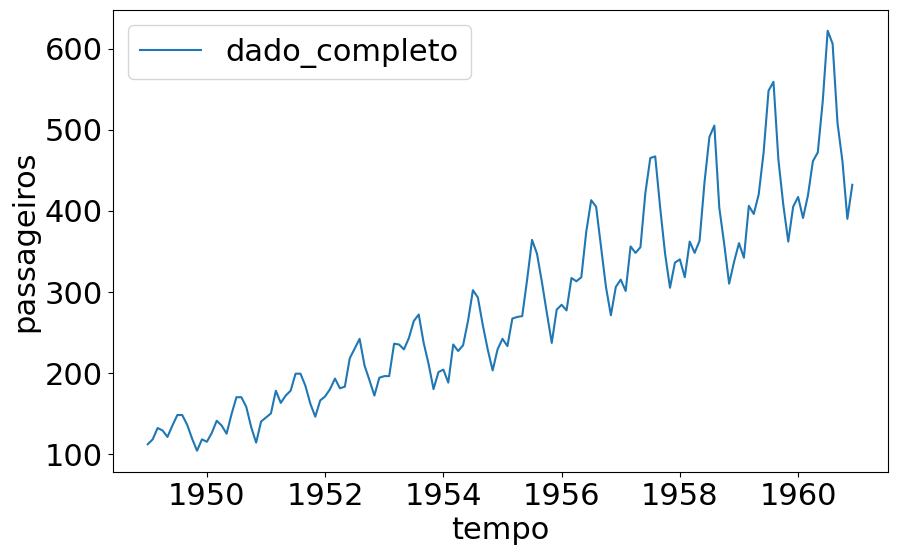

In [4]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')

# Pré processamento

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
X = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

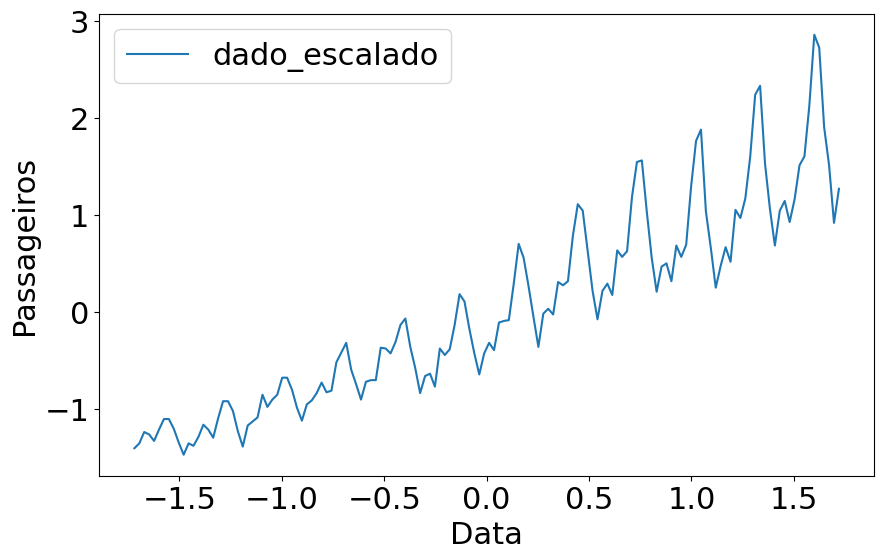

In [9]:
sns.lineplot(x=X, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [10]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [11]:
xtreino = X[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = X[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

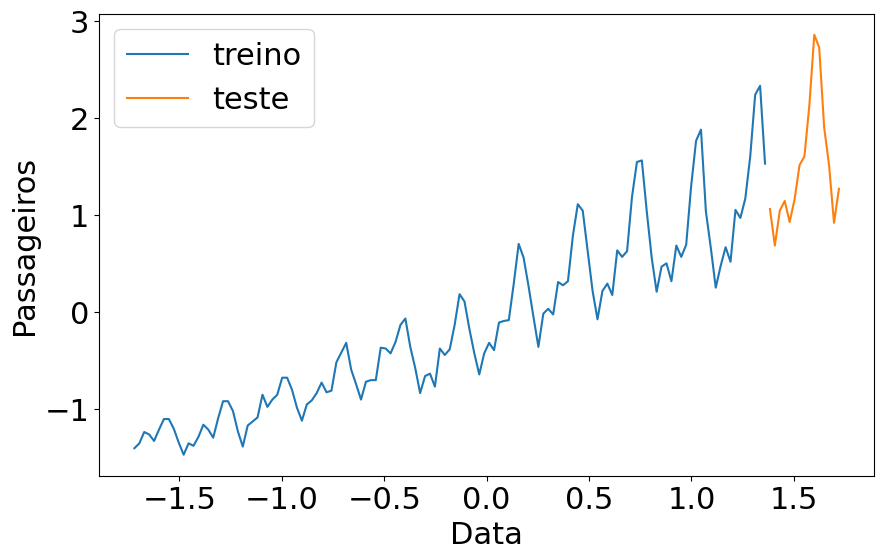

In [12]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Data')

# Regressão linear

In [13]:
# y = ax +b
regressor = Sequential()
regressor.add(Dense(units=1,
                    input_dim=1,
                    kernel_initializer='Ones',
                    activation='linear',
                    use_bias=False
                    ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
regressor.fit(xtreino, ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1241


In [17]:
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Text(0.5, 0, 'Data')

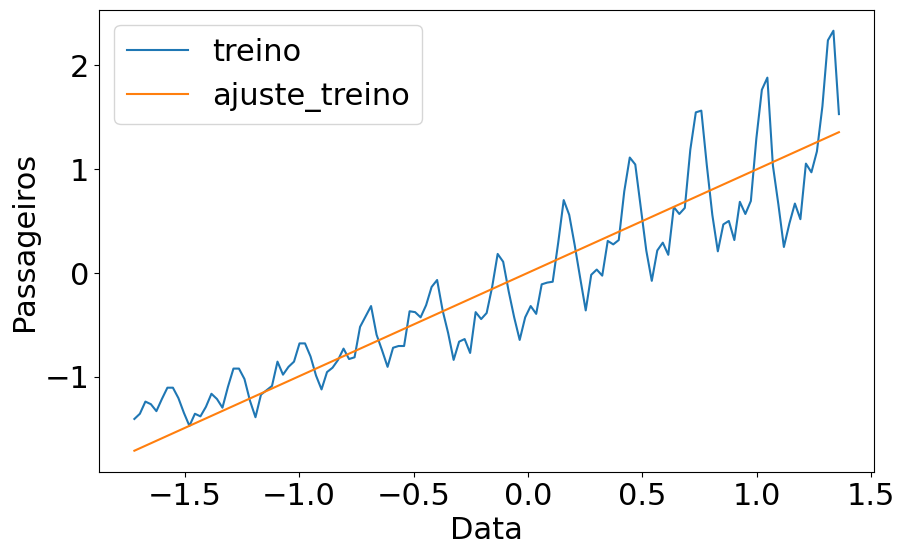

In [18]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

plt.ylabel('Passageiros')
plt.xlabel('Data')

In [19]:
d = {"tempo": xtreino,
     "passageiros": ytreino,
     "ajuste": y_predict[:,0]
     }
resultados = pd.DataFrame(data=d)

In [20]:
resultados

,tempo,passageiros,ajuste
0,-1.720064,-1.407779,-1.713656
1,-1.696007,-1.357590,-1.689689
2,-1.671950,-1.240483,-1.665722
3,-1.647894,-1.265578,-1.641755
4,-1.623837,-1.332496,-1.617787
...,...,...,...
124,1.262984,1.168570,1.258279
125,1.287041,1.603538,1.282246
126,1.311098,2.239260,1.306213
127,1.335155,2.331272,1.330181


In [21]:
resultado_transf = sc.inverse_transform(resultados[['tempo', 'ajuste']])

In [22]:
resultado_transf = pd.DataFrame(resultado_transf)

In [23]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

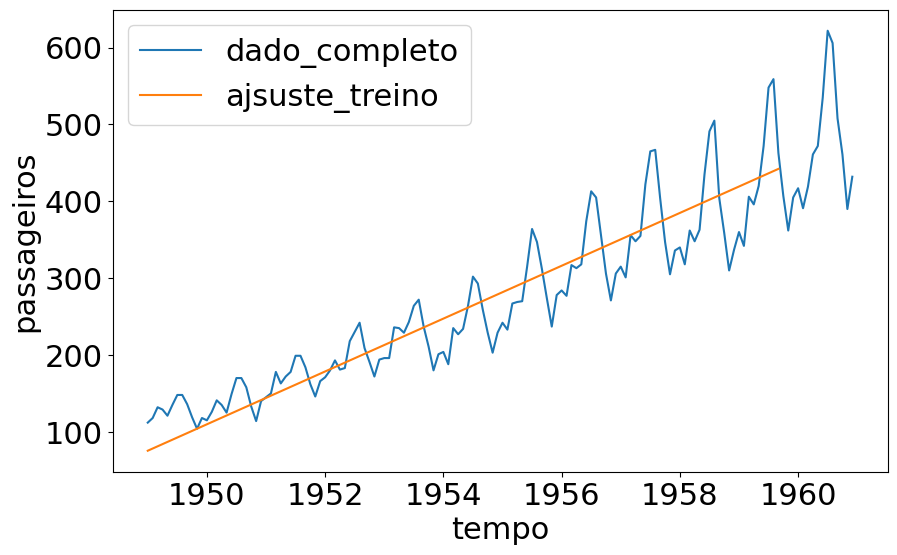

In [24]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')

In [25]:
y_predict_teste = regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [26]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [27]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)


In [28]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [29]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

In [30]:
resultado_transf_teste

,tempo,passageiros
0,1959.750000,445.050945
1,1959.833333,447.916209
2,1959.916667,450.781459
3,1960.000000,453.646708
4,1960.083333,456.511986
5,1960.166667,459.377235
6,1960.250000,462.242499
7,1960.333333,465.107748
8,1960.416667,467.972998
9,1960.500000,470.838262


<Axes: xlabel='tempo', ylabel='passageiros'>

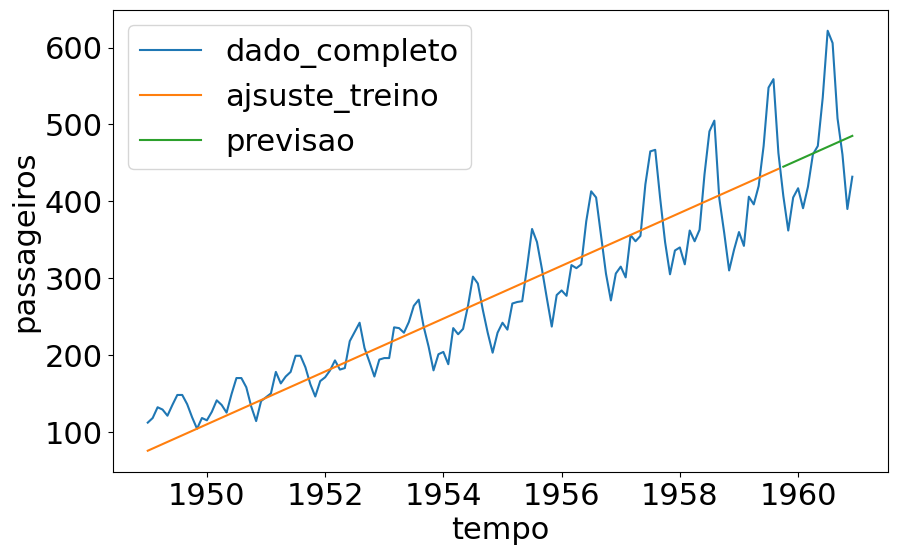

In [31]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste,label='previsao')

In [32]:
# z = w1*x1+b

In [33]:
regressor2 = Sequential()

In [34]:
regressor2.add(Dense(units=8,
                    input_dim=1,
                    kernel_initializer='random_uniform',
                    activation='sigmoid',
                    use_bias=False
                    ))

regressor2.add(Dense(8,
                     kernel_initializer='random_uniform',
                     activation='sigmoid',
                     use_bias=False))

regressor2.add(Dense(1,
                     kernel_initializer='random_uniform',
                     activation='linear',
                     use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
regressor2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
regressor2.fit(xtreino, ytreino,epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8663  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7824 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8079 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7502 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7903 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8370
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7493
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8204
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7677
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7930
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7515
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8344
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8075
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7420
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7454
Epoch 16/500
5/5 

In [38]:
y_predict = regressor2.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [39]:
y_predict_teste = regressor2.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Text(0.5, 0, 'Data')

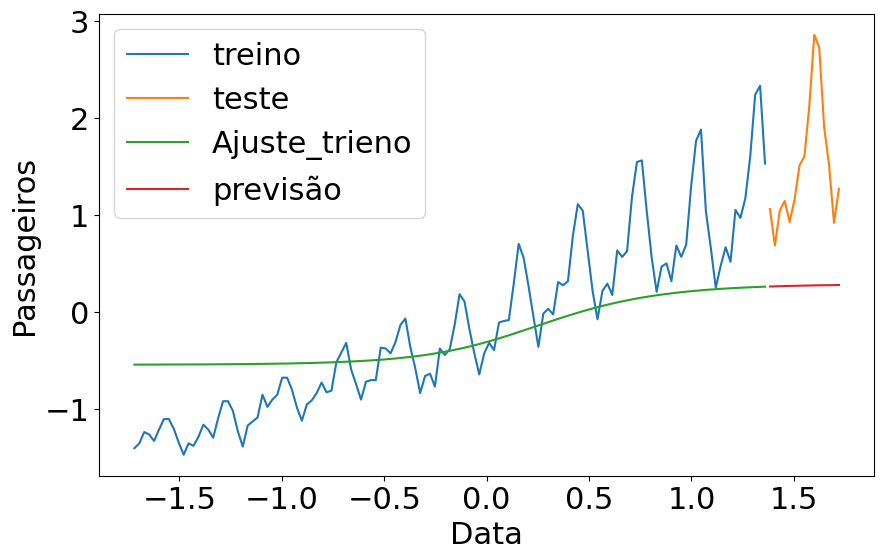

In [40]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Ajuste_trieno')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [41]:
import numpy as np

In [42]:
vetor = pd.DataFrame(ytreino)[0]

In [43]:
def separa_dados(vetor,n_passos):
  X_novo, y_novo = [],[]

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [44]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [45]:
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [46]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [47]:
vetor2 = pd.DataFrame(yteste)[0]

In [48]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [49]:
regressor3 = Sequential()

In [50]:
regressor3.add(Dense(8,input_dim=1,activation='linear',
                     kernel_initializer='ones',
                     use_bias=False))
regressor3.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform',use_bias=False))
regressor3.add(Dense(1, activation='linear', kernel_initializer='random_uniform',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
regressor3.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8414 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8089
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7225
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6709
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7292
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6555
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6885
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6767 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6024
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6000
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5498
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5358
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4931 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4648 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4270 
Epoch 16/100
4/4 

In [53]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<Axes: xlabel='tempo', ylabel='0'>

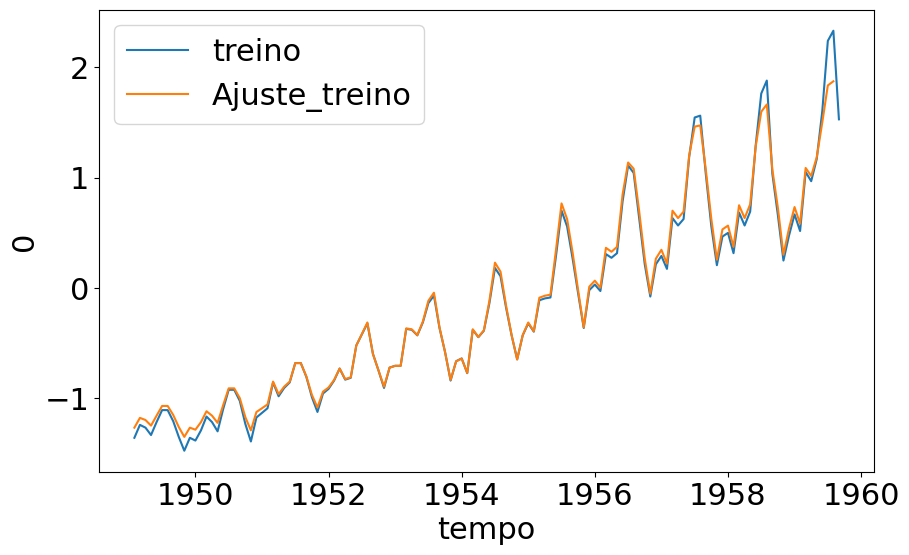

In [54]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste_treino')

In [55]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [56]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

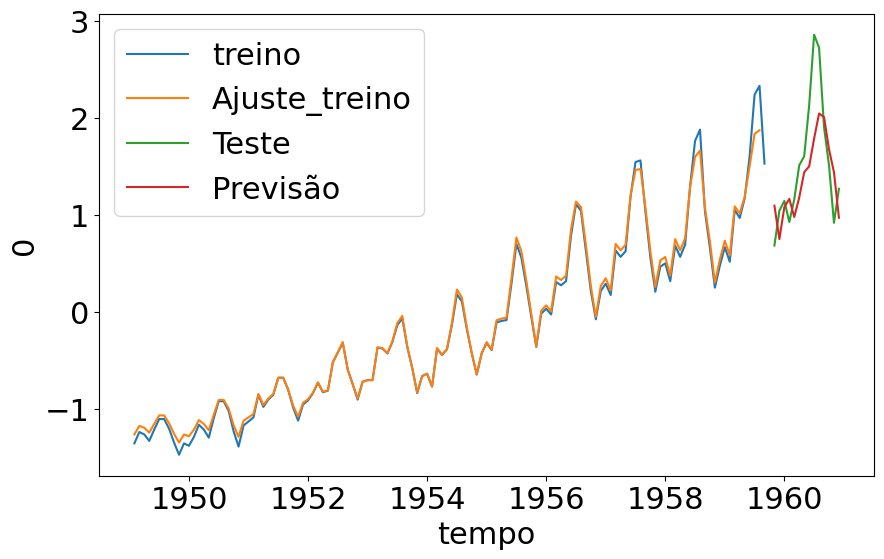

In [57]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[130:144], label='Teste')
sns.lineplot(x='tempo',y=resultado.values, data=passageiros[130:144], label='Previsão')

In [58]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [59]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [60]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [61]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [62]:
regressor4 = Sequential()

In [63]:
regressor4.add(Dense(8,input_dim=4,activation='linear',
                     kernel_initializer='ones',
                     use_bias=False))
regressor4.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform',use_bias=False))
regressor4.add(Dense(1, activation='linear', kernel_initializer='random_uniform',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
regressor4.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6776  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6521 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6066
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5168 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4702
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3907 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3847
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3260
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2169 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2386
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1773 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1680 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1379
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1639
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1647
Epoch 16/300
4/4 ━

In [66]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [67]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [68]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [69]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [70]:
# sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
# sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='Ajuste_treino')
# sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[133:144], label='Teste')
# sns.lineplot(x='tempo',y=resultado.values, data=passageiros[133:144], label='Previsão')

<Axes: xlabel='tempo'>

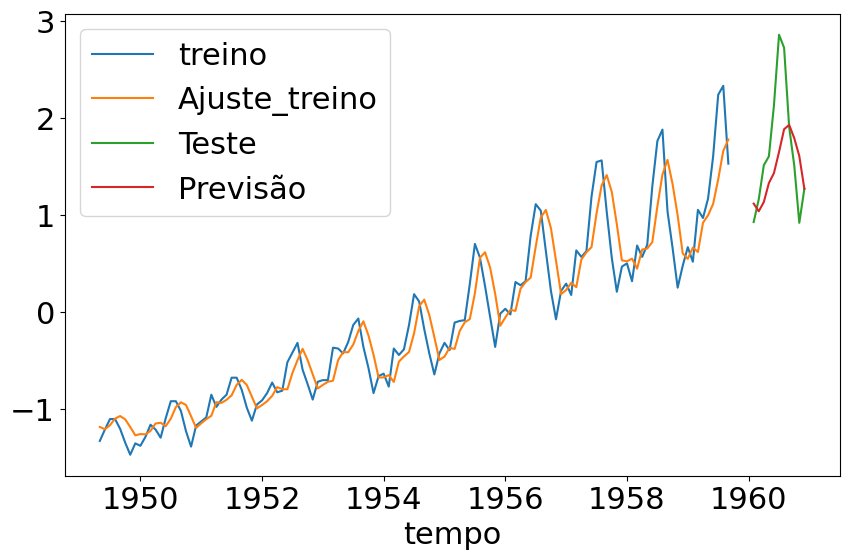

In [71]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='Ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[133:144], label='Teste')
sns.lineplot(x='tempo',y=resultado.values, data=passageiros[133:144], label='Previsão')

In [72]:
bike = pd.read_csv(r'https://raw.githubusercontent.com/OseiasBeu/FormacaoMachineLearningAvancada/main/Deep_Learning_Previsao_Com_Keras/bicicletas.csv')

In [73]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [74]:
bike['datas'] = pd.to_datetime(bike['datas'])

<Axes: xlabel='datas', ylabel='contagem'>

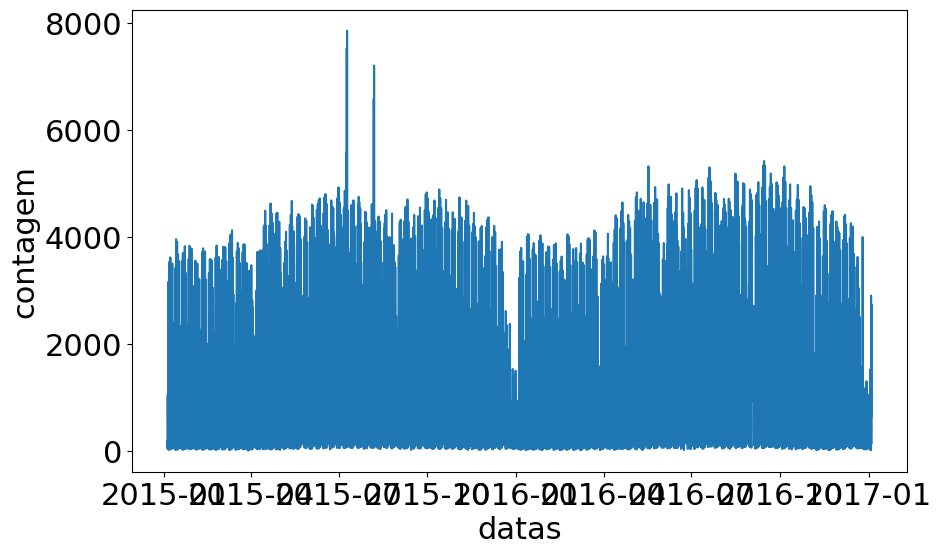

In [75]:
sns.lineplot(x='datas',y='contagem', data=bike)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

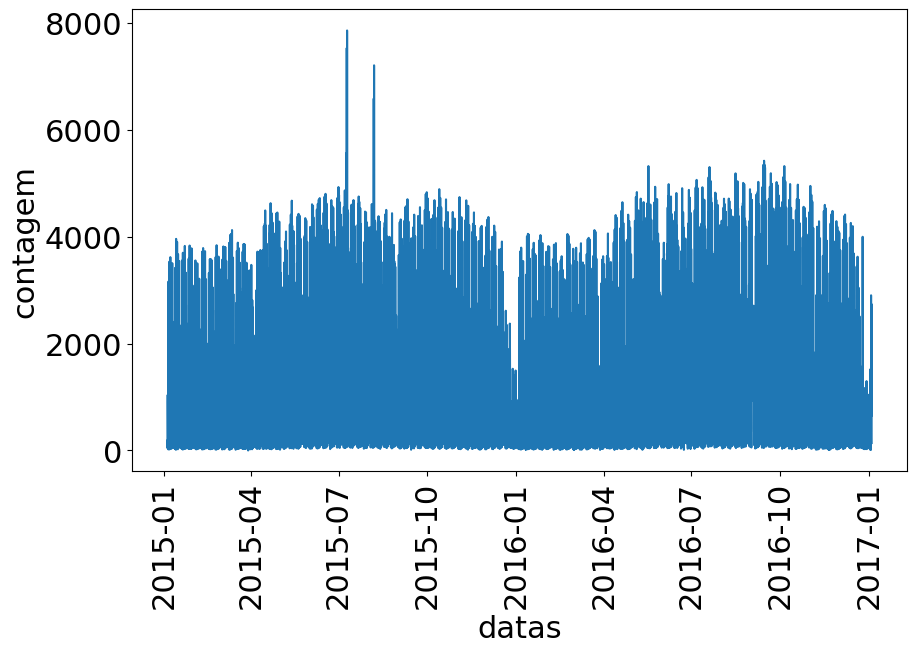

In [76]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=90)

In [77]:
sc2 = StandardScaler()

In [78]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [79]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [80]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [81]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

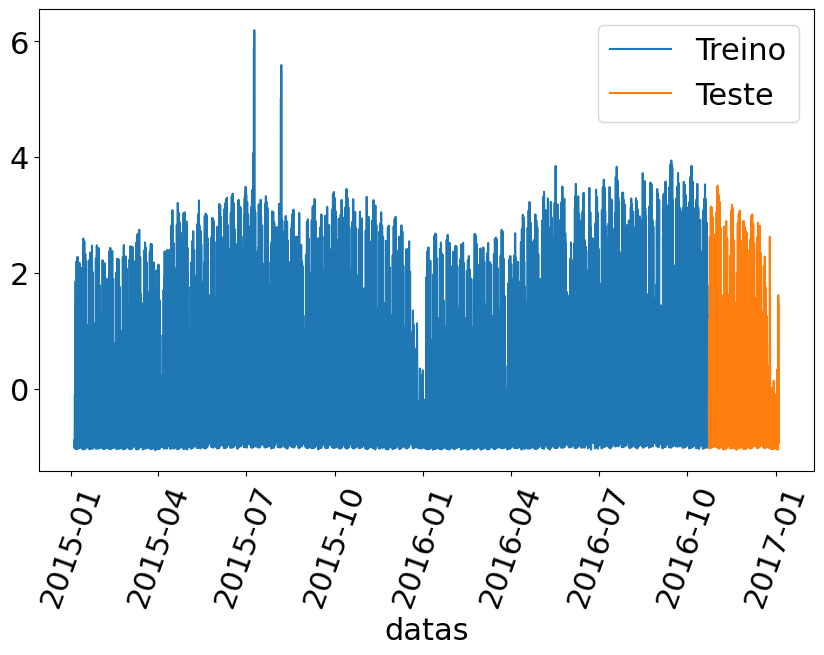

In [82]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='Treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='Teste')
plt.xticks(rotation=70)

In [83]:
vetor = pd.DataFrame(ytreino)[0]

In [84]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [85]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [86]:
vetor2 = pd.DataFrame(yteste)[0]

In [87]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [88]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [89]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))
# xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [90]:
recorrente = Sequential()

In [91]:
from tensorflow.keras.layers import LSTM

In [92]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [94]:
recorrente.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
recorrente.fit(xtreino_novo, ytreino_novo,
               validation_data=(xteste_novo,yteste_novo),
               epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.4956 - val_loss: 0.1296
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1007 - val_loss: 0.0421
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0592 - val_loss: 0.0506
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0520 - val_loss: 0.0321
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0420 - val_loss: 0.0292
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0399 - val_loss: 0.0253
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0371 - val_loss: 0.0302
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0345 - val_loss: 0.0240
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0347 - val_loss: 0.0250
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0339 - val_loss: 0.0193
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0373 - val_loss: 0.0223
Epoch 12/100
490/490 ━━━━

In [96]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

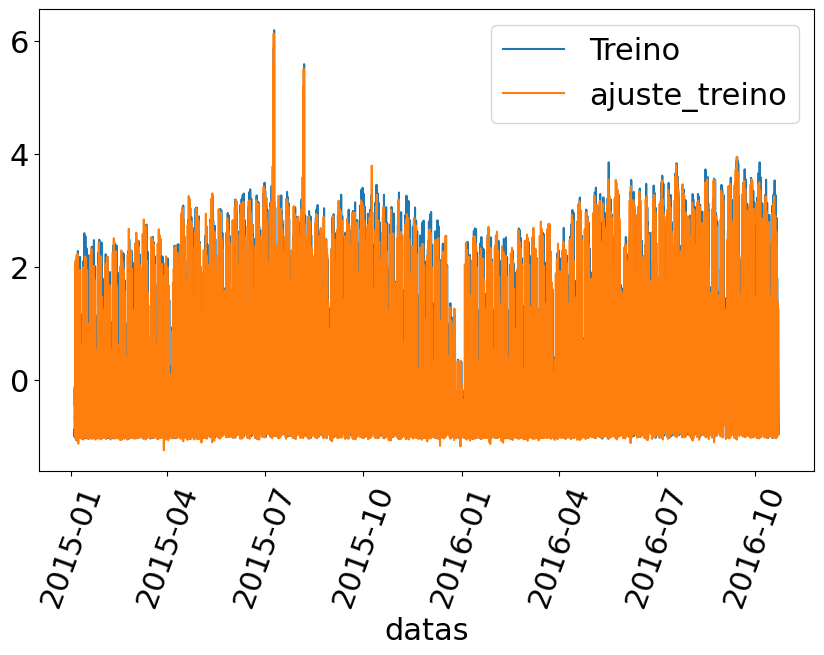

In [97]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='Treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=70)

In [98]:
y_predito = recorrente.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

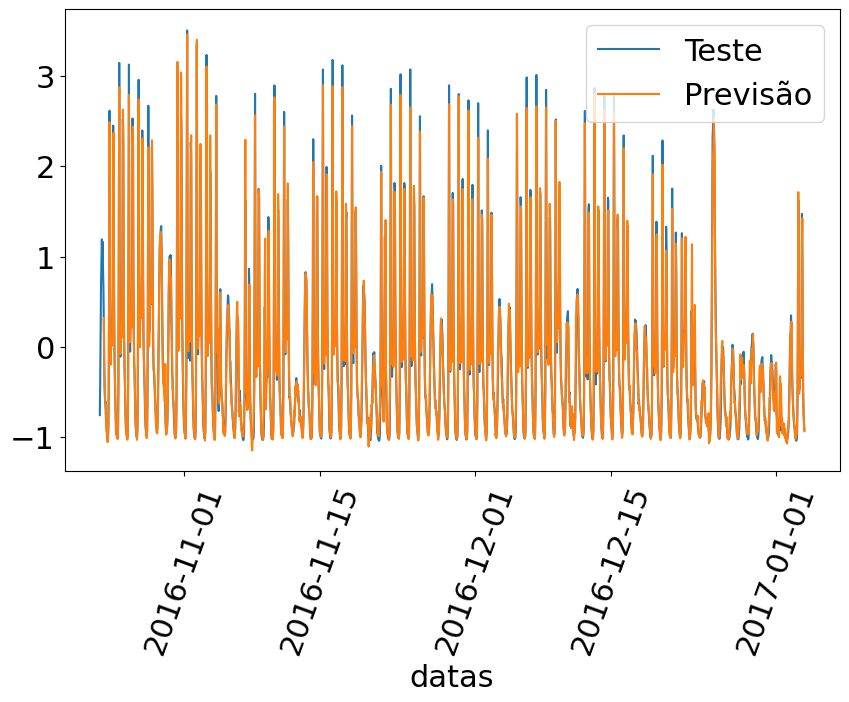

In [99]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='Teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='Previsão')
plt.xticks(rotation=70)

In [100]:
from tensorflow.keras.layers import GRU

In [101]:
recorrente_g = Sequential()

In [102]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))

In [103]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [105]:
recorrente.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,380 (521.02 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,691 (260.52 KB)

In [106]:
recorrente_g.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo,
               validation_data=(xteste_novo,yteste_novo),
               epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.3981 - val_loss: 0.0646
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0799 - val_loss: 0.0338
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0532 - val_loss: 0.0348
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0430 - val_loss: 0.0255
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0405 - val_loss: 0.0225
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0407 - val_loss: 0.0211
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0347 - val_loss: 0.0231
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0346 - val_loss: 0.0200
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0301 - val_loss: 0.0224
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0330 - val_loss: 0.0230
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0327 - val_loss: 0.0195
Epoch 12/100
490/490 ━━

In [108]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

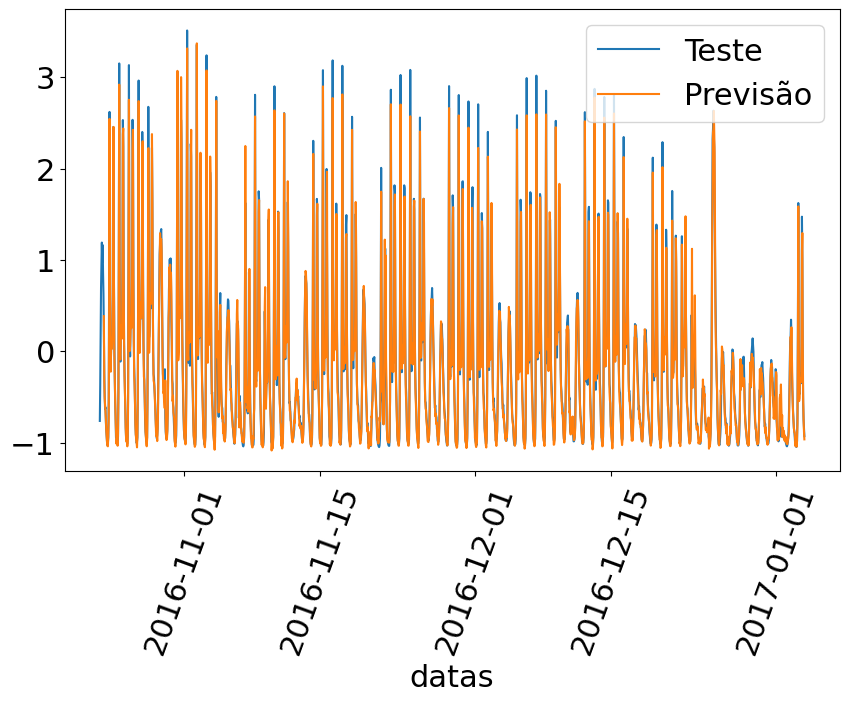

In [109]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='Teste')
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='Previsão')
plt.xticks(rotation=70)

In [110]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


In [113]:
# plt.plot(resultado.history['loss'])
# plt.plot(resultado.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

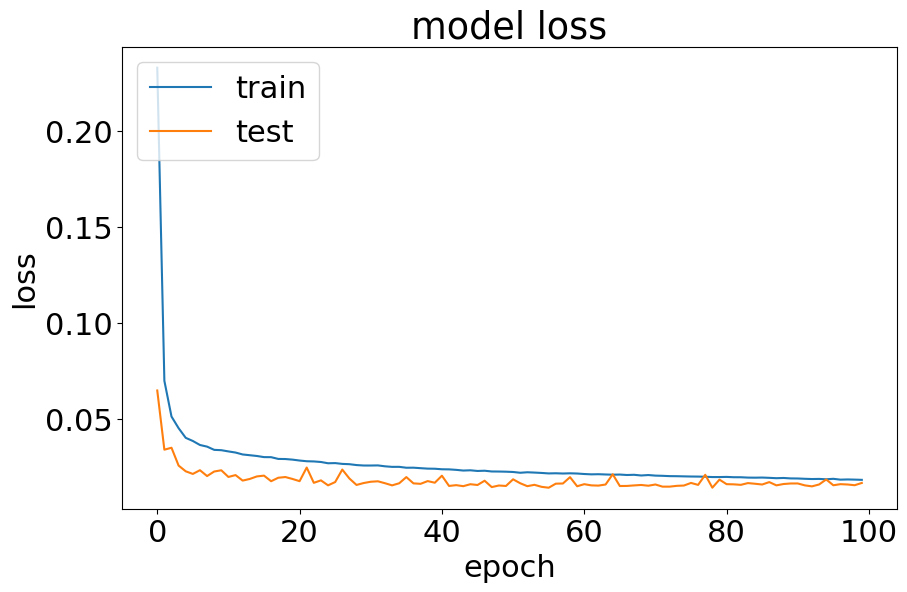

In [112]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()